<a href="https://colab.research.google.com/github/Courior/AngukarJs_NoteTaker/blob/master/DeepLearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part A - Tensorflow and Low Level API**

*(i) Two Layer Classifier*

In [0]:
import tensorflow as tf 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

In [2]:
import numpy as np
train_dress_images = train_images[train_labels == 3]
train_bag_images = train_images[train_labels == 8]
train_dress_bag_images = np.append(train_dress_images, train_bag_images, axis=0)
train_dress_labels = np.zeros((len(train_dress_images),), dtype=float)
train_bag_labels = np.ones((len(train_bag_images),), dtype=float)
train_dress_bag_labels = np.append(train_dress_labels, train_bag_labels, axis=0)

test_dress_images = test_images[test_labels == 3]
test_bag_images = test_images[test_labels == 8]
test_dress_bag_images = np.append(test_dress_images, test_bag_images, axis=0)
test_dress_labels = np.zeros((len(test_dress_images),), dtype=float)
test_bag_labels = np.ones((len(test_bag_images),), dtype=float)
test_dress_bag_labels = np.append(test_dress_labels, test_bag_labels, axis=0)

print(len(train_images))
print(len(train_dress_bag_images))
print(len(train_dress_images))
print(train_dress_bag_labels)
# Reshape training dataset so that the features are flattened
train_dress_bag_images = train_dress_bag_images.reshape(
    train_dress_bag_images.shape[0], -1).astype('float32')
test_dress_bag_images = test_dress_bag_images.reshape(
    test_dress_bag_images.shape[0], -1).astype('float32')

train_dress_bag_images = train_dress_bag_images.T
test_dress_bag_images = test_dress_bag_images.T
train_dress_bag_labels = np.reshape(train_dress_bag_labels, (-1,1)).T
test_dress_bag_labels = np.reshape(test_dress_bag_labels, (-1,1)).T
print(test_dress_bag_labels.shape)

60000
12000
6000
[0. 0. 0. ... 1. 1. 1.]
(1, 2000)


In [0]:
num_Iterations= 1000
display_step= 100


# Model Params
n_inputs = 784
n_hidden = 100
n_outputs=1
learning_rate= 0.01
n_epochs = 40

#training label data
x = tf.placeholder(tf.float32, [n_inputs,None])
y_ = tf.placeholder(tf.float32, [1,None])


In [4]:
# Weight Bias for each layer
W1 = tf.get_variable("W1", [n_hidden, n_inputs], initializer = 
                     tf.glorot_uniform_initializer(seed=1))
B1 = tf.get_variable("b1", [n_hidden, 1], initializer = tf.zeros_initializer())

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
W2 = tf.get_variable("W2", [n_outputs, n_hidden], 
                     initializer = tf.glorot_uniform_initializer(seed=1))
B2 = tf.get_variable("b2", [n_outputs, 1], 
                     initializer = tf.zeros_initializer())

In [0]:
A1 = tf.add(tf.matmul(W1, x), B1)
H1 = tf.nn.relu(A1)

W2_T = tf.transpose(W2) 

y_pred = tf.add(tf.matmul(W2, H1),B2)
y_pred_sigmoid = tf.sigmoid(y_pred) 

x_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_pred, labels=y_)
loss = tf.reduce_mean(x_entropy)

train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predictions = tf.round(y_pred_sigmoid)
predictions_correct = tf.cast(tf.equal(predictions, y_), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)


In [7]:
print(train_dress_bag_images.dtype)

float32


In [8]:
#Start training
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(n_epochs):
    _, currentLoss, acc = sess.run([train_step, loss, accuracy], 
                                   feed_dict={x: train_dress_bag_images, 
                                              y_:train_dress_bag_labels})
    print (currentLoss, " ", acc)
  print ("Final Validation Accuracy ", sess.run(accuracy, 
                                                feed_dict={
                                                    x: test_dress_bag_images, 
                                                    y_: test_dress_bag_labels}))


33.430927   0.40441668
1067.6387   0.6835833
172766.23   0.5
7.5709667   0.8516667
9.246185   0.85791665
0.5991754   0.58466667
0.5312035   0.63341665
0.598174   0.717
0.5025573   0.83533335
0.38415045   0.89625
0.19672711   0.9425833
0.14551131   0.9543333
0.13506822   0.96383333
0.12844925   0.9636667
0.12266154   0.9658333
0.11740979   0.96708333
0.11266065   0.96825
0.10843703   0.9688333
0.10479594   0.9694167
0.10151072   0.97041667
0.09854318   0.9711667
0.095901966   0.9715833
0.09347045   0.97241664
0.0911652   0.97275
0.089015715   0.9730833
0.08698284   0.9735
0.085074514   0.97425
0.08328893   0.97475
0.08157738   0.9751667
0.07996168   0.97583336
0.07834204   0.9763333
0.07672032   0.9765
0.07521229   0.97675
0.07400995   0.97675
0.07305372   0.97675
0.072134726   0.9769167
0.071307614   0.9773333
0.0705288   0.9775
0.06978875   0.97783333
0.069073886   0.97825
Final Validation Accuracy  0.973


(ii) Multi Class Classification

In [9]:
X_train = train_images.reshape(train_images.shape[0], -1).astype('float32')
X_test = test_images.reshape(test_images.shape[0], -1).astype('float32')
# Normalize training data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.T
X_test = X_test.T
# Convert labels to one-hot-encoded
number_of_classes = 10
Y_train = tf.keras.utils.to_categorical(train_labels, number_of_classes)
Y_test = tf.keras.utils.to_categorical(test_labels, number_of_classes)
# Transpose train labels so that dimensions
# are number of classes * number of instances
Y_train = Y_train.T
Y_test = Y_test.T
print ("Data extracted and reshaped: ")
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print (X_train.dtype, Y_train.dtype, X_test.dtype, Y_test.dtype)


Data extracted and reshaped: 
(784, 60000) (10, 60000) (784, 10000) (10, 10000)
float32 float32 float32 float32


In [50]:
import time
# Model Params
n_inputs = 784
n_layer_1 = 300
n_layer_2 = 100
n_outputs=10
learning_rate= 0.01
n_epochs = 40
error_values= list()
acc_values= list()
epoch_times= list()
tf.reset_default_graph()

with tf.name_scope("multi_class"):
  #training label data
  x_ = tf.placeholder(tf.float32, [n_inputs,None], name="x_")
  y = tf.placeholder(tf.float32, [10,None], name="y")

  WL1 = tf.get_variable("WL1", [n_layer_1, n_inputs],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL1 = tf.get_variable("bL1", [n_layer_1, 1], initializer = 
                        tf.zeros_initializer())
  WL2 = tf.get_variable("WL2", [n_layer_2, n_layer_1],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL2 = tf.get_variable("bL2", [n_layer_2, 1], initializer = 
                        tf.zeros_initializer())
  WL3 = tf.get_variable("WL3", [n_outputs, n_layer_2],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL3 = tf.get_variable("bL3", [n_outputs, 1], initializer = 
                        tf.zeros_initializer())

  A1 = tf.add(tf.matmul(WL1, x_), bL1)
  H1 = tf.nn.relu(A1)
  A2 = tf.add(tf.matmul(WL2, H1), bL2)
  H2 = tf.nn.relu(A2)
  A3 = tf.add(tf.matmul(WL3, H2), bL3)

  logits = tf.transpose(A3)
  labels = tf.transpose(y)

  error = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, 
                                                     labels=labels)
  loss = tf.reduce_mean(error)

  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

  correct_prediction = tf.equal(tf.argmax(A3), tf.argmax(y))

  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


  with tf.Session() as sess1:
    sess1.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
      start_time = time.time()
      _, currentLoss, acc = sess1.run([optimizer, loss, accuracy], 
                                      feed_dict={x_:X_train, y:Y_train})
      epoch_times.append(time.time() - start_time)
      print (currentLoss, " ", acc)
      error_values.append(currentLoss)
      acc_values.append(acc)
    print ("Final Validation Accuracy ", sess1.run(accuracy, 
                                                   feed_dict={x_:X_test, 
                                                              y:Y_test}))


2.4212787   0.0377
2.3744516   0.0563
2.3332126   0.08141667
2.2970483   0.1093
2.2650964   0.13246667
2.2363865   0.1541
2.2101717   0.17466667
2.1859055   0.19478333
2.1632242   0.21291667
2.1418507   0.23116666
2.1215613   0.2492
2.102186   0.26523334
2.0835872   0.27993333
2.065653   0.29303333
2.0482862   0.30435
2.031427   0.31446666
2.015002   0.32483333
1.9989715   0.33458334
1.9832876   0.34416667
1.9679234   0.35343334
1.9528588   0.36281666
1.9380683   0.37285
1.9235412   0.38246667
1.9092653   0.39285
1.8952293   0.40335
1.8814296   0.41456667
1.8678563   0.42403334
1.854493   0.43403333
1.8413328   0.44305
1.828368   0.45198333
1.8155909   0.46071666
1.8029957   0.4682
1.7905854   0.4753
1.7783554   0.4827
1.7662992   0.48988333
1.7544154   0.49625
1.7426956   0.50298333
1.7311378   0.5098
1.7197373   0.5158
1.7084917   0.5212833
Final Validation Accuracy  0.5207


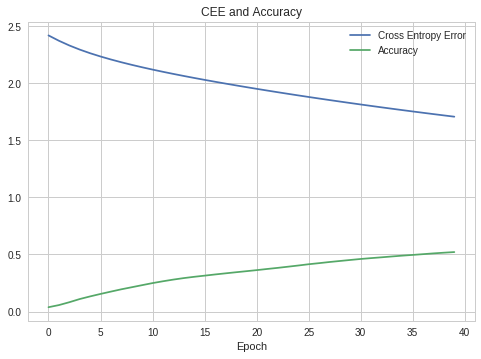

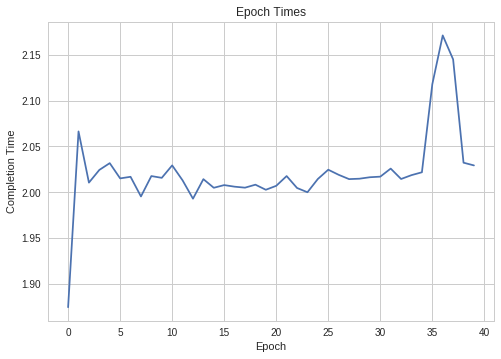

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.title('CEE and Accuracy')
plt.plot(error_values, label="Cross Entropy Error")
plt.plot(acc_values, label="Accuracy")
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.title('Epoch Times')
plt.plot(epoch_times)
plt.ylabel('Completion Time')
plt.xlabel('Epoch')

plt.show()

In [74]:
import random as rand
# Model Params
n_inputs = 784
n_layer_1 = 300
n_layer_2 = 100
n_outputs=10
learning_rate= 0.01
n_epochs = 40
error_values= list()
acc_values= list()
epoch_times= list()
mini_batch_size = 128
tf.reset_default_graph()
def create_batches(mini_batch_size, x, y):
  x_T = x.T
  y_T = y.T
  indices = list(range(x_T.shape[1]))
  # I dont know if I should shuffle the indicies or not, I dont think each batch
  # should be the same regardless of the epoch. Each epoch should split the 
  # training data into seperate batches
  rand.shuffle(indices)
  splits = list()
  splits = np.array_split(indices, mini_batch_size)
  X_batch = list()
  Y_batch = list()
  for split in splits:
    X_batch.append(x_T[split].T)
    Y_batch.append(y_T[split].T)
  return X_batch, Y_batch

with tf.name_scope("mini_batch"):
  #training label data
  x_ = tf.placeholder(tf.float32, [n_inputs,None], name="x_")
  y = tf.placeholder(tf.float32, [10,None], name="y")

  WL1 = tf.get_variable("WL1", [n_layer_1, n_inputs],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL1 = tf.get_variable("bL1", [n_layer_1, 1], initializer = 
                        tf.zeros_initializer())
  WL2 = tf.get_variable("WL2", [n_layer_2, n_layer_1],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL2 = tf.get_variable("bL2", [n_layer_2, 1], initializer = 
                        tf.zeros_initializer())
  WL3 = tf.get_variable("WL3", [n_outputs, n_layer_2],initializer = 
                        tf.glorot_uniform_initializer(seed=1) )
  bL3 = tf.get_variable("bL3", [n_outputs, 1], initializer = 
                        tf.zeros_initializer())

  A1 = tf.add(tf.matmul(WL1, x_), bL1)
  H1 = tf.nn.relu(A1)
  A2 = tf.add(tf.matmul(WL2, H1), bL2)
  H2 = tf.nn.relu(A2)
  A3 = tf.add(tf.matmul(WL3, H2), bL3)

  logits = tf.transpose(A3)
  labels = tf.transpose(y)

  error = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, 
                                                     labels=labels)
  loss = tf.reduce_mean(error)

  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

  correct_prediction = tf.equal(tf.argmax(A3), tf.argmax(y))

  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


  with tf.Session() as sess1:
    sess1.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
      start_time = time.time()
      X_batches, y_batches = create_batches(mini_batch_size, X_train, Y_train)
      epoch_avg_currentLoss = 0
      epoch_avg_acc = 0 
      for i in range(len(X_batches)):
        _, currentLoss, acc = sess1.run([optimizer, loss, accuracy],feed_dict={x_:X_batches[i], y:y_batches[i]})
        error_values.append(currentLoss)
        acc_values.append(acc)
      epoch_times.append(time.time() - start_time)
      # I know this adds to the run time but its just so I can compare results 
      # to the non minibatch version
      # currentLoss, acc = sess1.run([loss, accuracy],feed_dict={x_:X_train, y:Y_train})
      print(currentLoss, " ", acc, " " ,epoch_times[-1])
    print ("Final Validation Accuracy ", sess1.run(accuracy, 
                                                   feed_dict={x_:X_test, 
                                                              y:Y_test}))

1.1927654   0.6666667   0.32681846618652344
0.6314792   1.0   0.2788262367248535
0.87551993   0.6666667   0.3220024108886719
0.37174097   1.0   0.29726672172546387
0.494054   1.0   0.28463149070739746
0.67441076   0.8333333   0.27785706520080566
0.20392542   1.0   0.268402099609375
0.19912036   0.8333333   0.238785982131958
0.7593789   0.6666667   0.23694753646850586
0.8729268   0.8333333   0.247147798538208
0.38874602   1.0   0.25615525245666504
0.7649495   0.6666667   0.2542304992675781
0.1876422   1.0   0.2512495517730713
0.47567248   0.8333333   0.24342012405395508
0.4745443   0.6666667   0.24984240531921387
0.20846093   1.0   0.25350427627563477
0.44413313   0.8333333   0.25229907035827637
0.14819326   1.0   0.24730300903320312
0.2027967   0.8333333   0.252504825592041
0.25156918   0.8333333   0.2350938320159912
0.20323549   0.8333333   0.2446136474609375
0.633636   0.8333333   0.2538015842437744
0.29329285   1.0   0.261599063873291
0.047005117   1.0   0.24369430541992188
0.092730

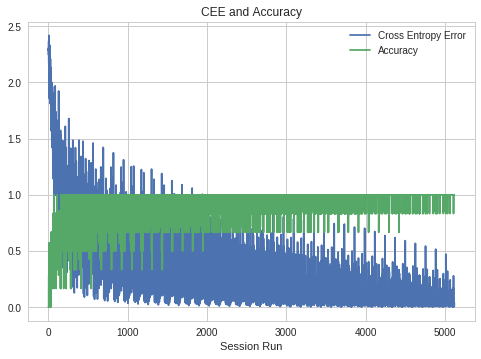

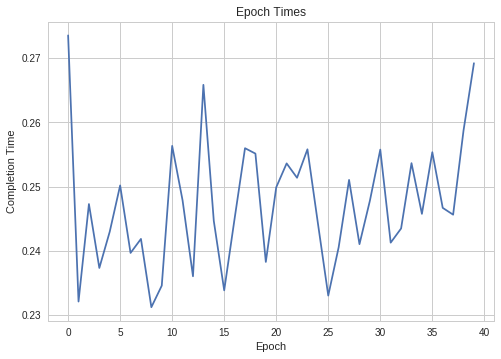

In [66]:
import matplotlib.pyplot as plt
plt.title('CEE and Accuracy')
plt.plot(error_values, label="Cross Entropy Error")
plt.plot(acc_values, label="Accuracy")
plt.xlabel('Session Run')
plt.legend()

plt.show()

plt.title('Epoch Times')
plt.plot(epoch_times)
plt.ylabel('Completion Time')
plt.xlabel('Epoch')

plt.show()

**Part B**

In [54]:
from google.colab import drive 
drive.mount('/content/gdrive') 



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [56]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip" 

Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
replace data.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [60]:
import h5py 
def loadData(): 
  with h5py.File('data.h5','r') as hf: 
    print('List of arrays in this file: \n', hf.keys()) 
    allTrain = hf.get('trainData') 
    allTest = hf.get('testData') 
    npTrain = np.array(allTrain) 
    npTest = np.array(allTest) 

    print('Shape of the array dataset_1: \n', npTrain.shape) 
    print('Shape of the array dataset_2: \n', npTest.shape)     
  return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1] 




List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [81]:
trainX, trainY, testX, testY = loadData() 

List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [88]:
# Normalize training data
X_train = trainX / 255.0
X_test = testX / 255.0

number_of_classes = 10
Y_train = trainY
Y_test = testY
print ("Data extracted and reshaped: ")
print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print (X_train.dtype, Y_train.dtype, X_test.dtype, Y_test.dtype)


Data extracted and reshaped: 
(200000, 784) (200000,) (17000, 784) (17000,)
float64 float64 float64 float64


In [95]:
# Model Params
n_inputs = 784
n_epochs = 10
n_layer_1 = 200
n_softmax = 10
n_batch_size = 256
s_optimizer = 'adam'
s_loss= 'sparse_categorical_crossentropy'
a_metrics = ['accuracy']

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n_layer_1, activation=tf.nn.relu, input_shape=(n_inputs,)),
    tf.keras.layers.Dense(n_softmax, activation=tf.nn.softmax)])
model.compile(optimizer=s_optimizer, loss=s_loss, 
              metrics=a_metrics)
model.fit(X_train, Y_train, epochs=n_epochs, batch_size=n_batch_size)

results = model.evaluate(X_test, Y_test)

print(results)



Epoch 1/40
200000/200000 [==============================] - 7s 34us/sample - loss: 2.2999 - acc: 0.2352
Epoch 2/40
200000/200000 [==============================] - 7s 33us/sample - loss: 2.2994 - acc: 0.2445
Epoch 3/40
200000/200000 [==============================] - 7s 33us/sample - loss: 2.2989 - acc: 0.3101
Epoch 4/40
200000/200000 [==============================] - 7s 33us/sample - loss: 2.2985 - acc: 0.2962
Epoch 5/40
200000/200000 [==============================] - 6s 32us/sample - loss: 2.2980 - acc: 0.3707
Epoch 6/40
200000/200000 [==============================] - 6s 32us/sample - loss: 2.2976 - acc: 0.3820
Epoch 7/40
200000/200000 [==============================] - 7s 33us/sample - loss: 2.2971 - acc: 0.4438
Epoch 8/40
200000/200000 [==============================] - 7s 33us/sample - loss: 2.2966 - acc: 0.4562
Epoch 9/40
200000/200000 [==============================] - 7s 34us/sample - loss: 2.2961 - acc: 0.4359
Epoch 10/40
200000/200000 [==============================] - 7s 